In [1]:
from DIW import *
from skimage.data import astronaut
from skimage.data import camera
from skimage.data import coffee
from skimage.data import coins
from skimage.filters import gaussian
from PIL import Image
from copy import deepcopy
import math
import skimage
import haarPsi as hp
import cv2

# 25 bits maximum to watermark
BITS_TO_WATERMARK = [0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1]

In [2]:
# First attack function
def addGaussianNoise(original_image, psnrdb=40):

    k = 1.0/math.pow(10,psnrdb/20.0)

    gaussian_noise = np.random.normal(scale=k*np.max(original_image), size=original_image.shape)

    added_gaussian_image = original_image+gaussian_noise

    signal = np.sum(np.square(original_image,dtype=float))

    noise = np.sum(np.square(original_image-added_gaussian_image,dtype=float))

    return added_gaussian_image

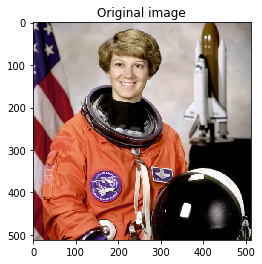

In [3]:
plt.figure()
plt.title("Original image")

############################################

image = astronaut()

#image = camera()

#image = coffee()

#image = coins()

plt.imshow(image, cmap="gray")

In [4]:
examples = [
    {
        'image': image,
        'left' : 30,
        'right': 50,
        'block_size': 100,
        'num_bits':1,
        'attack':None
    },
    {
        'image': image,
        'left' : 30,
        'right': 50,
        'block_size': 100,
        'num_bits':2,
        'attack':None
    },
    {
        'image': image,
        'left' : 30,
        'right': 50,
        'block_size': 100,
        'num_bits':3,
        'attack':None
    },
    {
        'image': image,
        'left' : 30,
        'right': 50,
        'block_size': 100,
        'num_bits':4,
        'attack':None
    },
    {
        'image': image,
        'left' : 30,
        'right': 50,
        'block_size': 100,
        'num_bits':5,
        'attack':None
    },
    {
        'image': image,
        'left' : 30,
        'right': 50,
        'block_size': 100,
        'num_bits':6,
        'attack':None
    },
    {
        'image': image,
        'left' : 30,
        'right': 50,
        'block_size': 100,
        'num_bits':7,
        'attack':None
    },
    {
        'image': image,
        'left' : 30,
        'right': 50,
        'block_size': 100,
        'num_bits':8,
        'attack':None
    },
    {
        'image': image,
        'left' : 30,
        'right': 50,
        'block_size': 100,
        'num_bits':9,
        'attack':None
    },
    {
        'image': image,
        'left' : 30,
        'right': 50,
        'block_size': 100,
        'num_bits':10,
        'attack':None
    }
]

In [ ]:
examples = [
    {
        'image': image,
        'left' : 30,
        'right': 50,
        'block_size': 100,
        'num_bits':1,
        'attack':addGaussianNoise
    },
    {
        'image': image,
        'left' : 30,
        'right': 50,
        'block_size': 100,
        'num_bits':2,
        'attack':addGaussianNoise
    },
    {
        'image': image,
        'left' : 30,
        'right': 50,
        'block_size': 100,
        'num_bits':3,
        'attack':addGaussianNoise
    },
    {
        'image': image,
        'left' : 30,
        'right': 50,
        'block_size': 100,
        'num_bits':4,
        'attack':addGaussianNoise
    },
    {
        'image': image,
        'left' : 30,
        'right': 50,
        'block_size': 100,
        'num_bits':5,
        'attack':addGaussianNoise
    },
    {
        'image': image,
        'left' : 30,
        'right': 50,
        'block_size': 100,
        'num_bits':6,
        'attack':addGaussianNoise
    },
    {
        'image': image,
        'left' : 30,
        'right': 50,
        'block_size': 100,
        'num_bits':7,
        'attack':addGaussianNoise
    },
    {
        'image': image,
        'left' : 30,
        'right': 50,
        'block_size': 100,
        'num_bits':8,
        'attack':addGaussianNoise
    },
    {
        'image': image,
        'left' : 30,
        'right': 50,
        'block_size': 100,
        'num_bits':9,
        'attack':addGaussianNoise
    },
    {
        'image': image,
        'left' : 30,
        'right': 50,
        'block_size': 100,
        'num_bits':10,
        'attack':addGaussianNoise
    }
]

In [5]:
BER_list = []
HaarPsi_list = []
PSNR_list = []
# experiment(original_image, left, right, block_size, num_bits, attack)
for example in examples:
    BER,HaarPsi,PSNR = experiment(example['image'],
                      example['left'],
                      example['right'],
                      example['block_size'],
                      example['num_bits'],
                      example['attack']
                    )
    BER_list.append(BER)
    HaarPsi_list.append(HaarPsi)
    PSNR_list.append(PSNR)
    print("Number of hidden bits: ",example['num_bits'],'bits')
    print("BER:",BER)
    print("HaarPsi:",HaarPsi)
    print("PSNR:",PSNR)
    print()

WATERMARKED_BITS	EXTRACTED_BITS
1			1
Number of hidden bits:  1 bits
BER: 0.0
HaarPsi: 0.9958230692356437
PSNR: 43.611112309143664

WATERMARKED_BITS	EXTRACTED_BITS
1			1
0			0
Number of hidden bits:  2 bits
BER: 0.0
HaarPsi: 0.9928230174337511
PSNR: 40.38660896265455

WATERMARKED_BITS	EXTRACTED_BITS
0			0
1			1
1			1
Number of hidden bits:  3 bits
BER: 0.0
HaarPsi: 0.9891250254640747
PSNR: 38.71757681627311

WATERMARKED_BITS	EXTRACTED_BITS
1			1
1			1
1			1
0			0
Number of hidden bits:  4 bits
BER: 0.0
HaarPsi: 0.9893652160460715
PSNR: 37.28689464038134

WATERMARKED_BITS	EXTRACTED_BITS
0			0
1			1
0			0
1			1
0			0
Number of hidden bits:  5 bits
BER: 0.0
HaarPsi: 0.9877808362806512
PSNR: 37.12531480791279

WATERMARKED_BITS	EXTRACTED_BITS
1			1
1			1
0			0
1			1
0			0
1			1
Number of hidden bits:  6 bits
BER: 0.0
HaarPsi: 0.9833399528634276
PSNR: 36.31151017998165

WATERMARKED_BITS	EXTRACTED_BITS
1			1
1			1
0			0
1			1
1			1
0			0
1			1
Number of hidden bits:  7 bits
BER: 0.0
HaarPsi: 

Text(0.5,0,'Number of embedded bits')

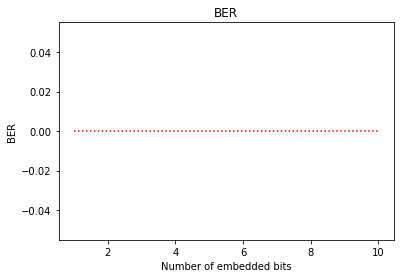

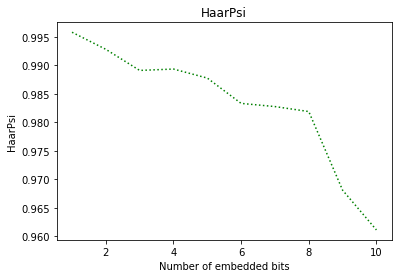

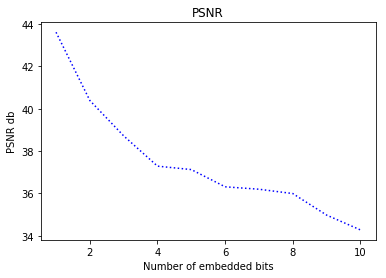

In [6]:
num_bits = [ exp['num_bits'] for exp in examples]

plt.figure()
plt.title("BER")
plt.plot(num_bits,BER_list,"r:")
plt.ylabel("BER")
plt.xlabel("Number of embedded bits")

plt.figure()
plt.title("HaarPsi")
plt.plot(num_bits,HaarPsi_list,"g:")
plt.ylabel("HaarPsi")
plt.xlabel("Number of embedded bits")

plt.figure()
plt.title("PSNR")
plt.plot(num_bits,PSNR_list,"b:")
plt.ylabel("PSNR db")
plt.xlabel("Number of embedded bits")